# Energy A.I. Hackathon 2021 Workflow - Team Anticline
#### Authors: Esmail Eltahan, Jeon Jonghyeon, Mehran Mehrabi, and Esmail Eltahan, Hildebrand Department of Petroleum and Geosystems Engineering. 
#### The University of Texas at Austin, Austin, Texas USA 

<img src="anticline_official_logo.png" width=300 />



# Reservoir Unit Description

## Size
Clastic deepwater reservoir with extents 10km by 10km by 50m.

## Fluid
Average connate water saturation: 0.203

Initial WOC depth: 3067.4 m

## Structure
Anticline with a major fault.

Fault equation: y = -x + 11750

# Data Visulatization 

Here, we visualize the raw data to inspect and look for any trends

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

print(pd.__version__)

0.25.3


## Load the data 



In [2]:
# reservoir unit info
ai = np.load("2d_ai.npy")
sand_proportion = np.load("2d_sand_propotion.npy")
sandy_shale_proportion = np.load("2d_sandy_shale_propotion.npy")
shale_proportion = np.load("2d_shale_propotion.npy")
shaly_sand_proportion = np.load("2d_shaly_sand_propotion.npy")
permeability = np.load("perm_000.npy")
porosity = np.load("por_000.npy")
top_depth = np.load("2d_top_depth.npy")

# wells dataframe
df_producers = pd.read_csv('wellbore_data_producer_wells.csv')
df_nonproducers = pd.read_csv('wellbore_data_preproduction_well.csv')
df_producers.columns = ['id','x','y','depth','poro','perm','ai','facies', 'rho','vel','E','sh_v','G']
df_nonproducers.columns = ['id','x','y','depth','poro','perm','ai','facies', 'rho','vel','E','sh_v','G']


# add i and j columns. origin is top left corner. 
# i traverses from left to right. j traverses from top to bottom
# x and y are the coordinates of the center of gridblocks (25<= x,y <=9975)
df_producers['i'] = df_producers['x'].apply(lambda x: int((x-25)/50))
df_producers['j'] = df_producers['y'].apply(lambda x: int((x-25)/50))
df_nonproducers['i'] = df_nonproducers['x'].apply(lambda x: int((x-25)/50))
df_nonproducers['j'] = df_nonproducers['y'].apply(lambda x: int((x-25)/50))

# distance to water-oil-contact
dis_woc = 3067.4 - top_depth

# initial pressure 
initial_pressure = top_depth*3.2808*0.7

# production data
df_hist = pd.read_csv('production_history.csv')
df_hist.columns = ['id','cumo1','cumo2','cumo3', 'cumw1','cumw2','cumw3']

# imputed perm and poro (and a lot of other things but we're gonna use only poro and perm)
df_p_imputed = pd.read_csv('df_p_preprocessed_000.csv')
df_n_imputed = pd.read_csv('df_n_preprocessed_000.csv')

print(df_producers.shape)
df_producers.head()

(1460, 15)


,id,x,y,depth,poro,perm,ai,facies,rho,vel,E,sh_v,G,i,j
0,Well_no_1,7325,7175,3052.8,0.13330,NaN,6981171.853,Sandstone,2.280137,3106.544655,24.721555,1690.417133,7.304717,146,143
1,Well_no_1,7325,7175,3053.3,0.13865,NaN,7234748.871,Sandstone,2.135061,4003.697087,23.360728,1573.847967,5.202120,146,143
2,Well_no_1,7325,7175,3053.8,0.14638,NaN,7157383.755,Sandstone,1.991045,3462.569030,28.232152,1636.279139,NaN,146,143
3,Well_no_1,7325,7175,3054.3,NaN,NaN,NaN,Sandstone,1.694242,3836.960702,29.220132,1613.043048,5.074763,146,143
4,Well_no_1,7325,7175,3054.8,0.14993,NaN,NaN,Sandstone,1.664371,3919.585777,NaN,1636.846284,5.277834,146,143


In [3]:
print(df_n_imputed.shape, df_p_imputed.shape)
df_n_imputed.head()

(10, 39) (73, 39)


,Well_ID,X,Y,Depth,Porosity,Perm,AI,Density,Comp_vel,E,...,sandshaly prp.,k/log_mindist,area_poly,woc rise 0,woc rise 1,woc rise 2,woc rise 3,bottom to woc 1,bottom to woc 2,bottom to woc 3
0,Well_no_74,7925.0,5525.0,3055.26,0.128256,261.733382,7.218588e+06,2.149767,3375.797050,25.810921,...,0.85,39.772322,939.116642,0,1.519585,2.294044,2.800758,5.870415,5.095956,4.589242
1,Well_no_75,8125.0,4425.0,3054.59,0.125245,113.954081,7.313975e+06,2.131232,3539.327750,25.635220,...,0.80,18.671703,2000.000000,0,1.496729,2.263921,2.767209,6.563271,5.796079,5.292791
2,Well_no_76,7725.0,4625.0,3054.01,0.135407,139.366917,7.366260e+06,1.900741,3865.620500,28.351062,...,0.75,23.671081,333.220269,0,1.597184,2.405718,2.931561,7.042816,6.234282,5.708439
3,Well_no_77,6825.0,4475.0,3052.51,0.135973,157.334009,7.275353e+06,1.977436,3702.560227,27.348244,...,0.90,26.812046,838.347130,0,1.614867,2.435809,2.972389,8.525133,7.704191,7.167611
4,Well_no_78,7425.0,3975.0,3053.76,0.134144,88.815067,7.341486e+06,1.934642,3770.355523,28.129156,...,0.90,13.995903,663.193027,0,1.544949,2.333893,2.850364,7.345051,6.556107,6.039636


# Missing Data Distribution
* We found the distribution of the missing data in both producers and non-producers are very similar.
* In both dat sets, permeability has the highest percentage of missing.


Index(['poro', 'perm', 'ai', 'facies', 'rho', 'vel', 'E', 'sh_v', 'G', 'i',
       'j'],
      dtype='object')
[ 192 1176  103  130  212  184  199  190  175    0    0]


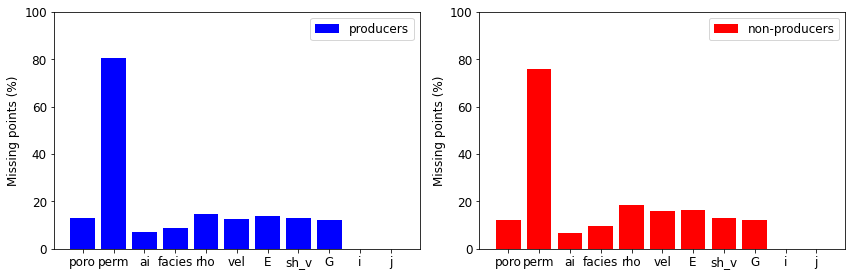

In [4]:
%matplotlib inline
mpl.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,2,figsize=[12,4])


producers_sample_num = len(df_producers.index)
nonproducers_sample_num = len(df_nonproducers.index)

producers_total_n = len(df_producers.index)
df_p = df_producers.drop(['id','x','y','depth'],axis=1)
df_n = df_nonproducers.drop(['id','x','y','depth'],axis=1)

df_producers_stat = df_p.isna().sum()
df_nonproducers_stat = df_n.isna().sum()



ax[0].bar(df_producers_stat.index, df_producers_stat.values/producers_sample_num*100,label='producers',color='b')
ax[0].set_ylabel('Missing points (%)')
ax[0].legend(loc='best')
ax[0].set_ylim([0,100])

ax[1].bar(df_nonproducers_stat.index, df_nonproducers_stat.values/nonproducers_sample_num*100,label='non-producers',color='r')
ax[1].set_ylabel('Missing points (%)')
ax[1].legend(loc='best')
ax[1].set_ylim([0,100])

plt.tight_layout()

print(df_producers_stat.index)
print(df_producers_stat.values)


total number of samples: 1460
total number of samples: 200


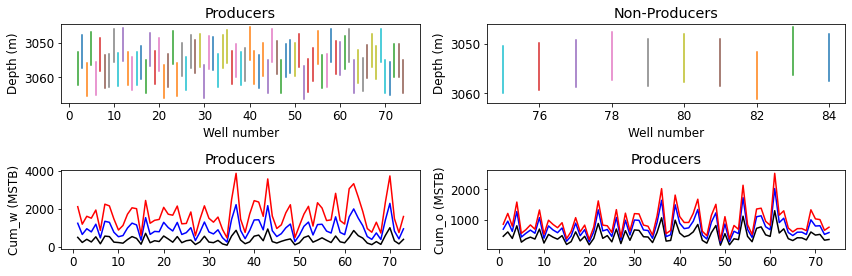

In [5]:
fig, ax = plt.subplots(2,2,figsize=[12,4])

def get_sample_depth(df_wells):
    well_book = {}
    df_unique_wells = df_wells['id'].value_counts()
    print('total number of samples: %d'%len(df_wells.index))
    for well in df_unique_wells.index:
        depth = df_wells[df_wells['id']==well]['depth'].to_numpy()
        number_of_samples = df_unique_wells[well]
        
        mind, maxd = min(depth), max(depth)
#         print(maxd-mind)
        sample_freq = (maxd-mind)/number_of_samples
        well_book[well] = (number_of_samples,mind,maxd,sample_freq)
        

    return well_book

producers_well_book = get_sample_depth(df_producers)
nonproducers_well_book = get_sample_depth(df_nonproducers)


def plot_sampling_range(well_book, ax, title):
    for well in well_book.keys():
        (num,mind,maxd,freq) = well_book[well]
        i = well.rsplit('_', maxsplit=1)[-1]
        i = int(i)
        ax.plot([i+1,i+1],[mind,maxd])
        ax.set_ylabel('Depth (m)')
        ax.set_xlabel('Well number')
        ax.set_title(title)
        

plot_sampling_range(producers_well_book, ax[0,0], 'Producers')
plot_sampling_range(nonproducers_well_book, ax[0,1], 'Non-Producers')
#reverse y-axis as it shows depth
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1])
ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])

ax[1,0].plot(np.linspace(1,73,73), df_hist['cumw1'].values, color='k',label='1st')
ax[1,0].plot(np.linspace(1,73,73), df_hist['cumw2'].values, color='b',label='2nd')
ax[1,0].plot(np.linspace(1,73,73), df_hist['cumw3'].values, color='r',label='3rd')
ax[1,0].set_title('Producers')
ax[1,0].set_ylabel('Cum_w (MSTB)')
# ax[1,0].legend(loc='best')

ax[1,1].plot(np.linspace(1,73,73), df_hist['cumo1'].values, color='k',label='1st')
ax[1,1].plot(np.linspace(1,73,73), df_hist['cumo2'].values, color='b',label='2nd')
ax[1,1].plot(np.linspace(1,73,73), df_hist['cumo3'].values, color='r',label='3rd')
ax[1,1].set_title('Producers')
ax[1,1].set_ylabel('Cum_o (MSTB)')
#ax[1,1].legend(loc='best')


plt.tight_layout()


# Prediction of Cumulative Productions From Previous Years

## Summary
Based on some observations from the data (explained in detail later) we built a model to forcast cumulative production of each year from the previous one. Although we can use the production data only from the 1st year to build different models for the 2nd and 3rd year, we found that to build a model for each year leveraging the data from the previous year is more accurate due to less propagation of error due to model uncertainty; also, this will also allow us to take advantage of the availabe data of the 2nd year.

## Data Trend and Observation

Let Aw, Ao be the cumulative water and oil production over the first year, respectively. Similarly, let Bw, Bo, Cw, and Co be the cumulative water and oil production over the second and third year, respectively. Also, let Awo, Bwo, and Cwo denote, Aw/Ao, Bw/Bo, and Cw/Co respectively. After a thorough analysis of the history of the production data, we made the following observations:

* The total production of all the wells over the 1st, 2nd and 3rd year are constant, i.e. A = Aw+Ao B = Bw+Bo, C = Cw+Co; A == B == C.

* The ratio of the cumulative produced water over the cumulative produced oil can be scaled for almost all the wells over different time intervals.  In other words, for almost all the wells:

    * Bw/Bo is proportional to Aw/Ao with the factor of approximately m=2.7
    * Cw/Co is proportional to Bw/Bo with the factor of approximately n=1.7
    
Based on the above observations, we developed two simple one-parameter models that gives reasonable accuracy for almost all the wells. The models are presented in the next section.

## Mathematical Models for Production Data


$B_w = \frac{m A_{wo}}{1+m A_{wo}}A$, and $B_o = \frac{1}{1+m A_{wo}}A$, where $m$ is the proportionality factor obtained from the data, $B_{wo}\approx m A_{wo}$, and is approximately $2.7$.

Similarly, $C_w = \frac{n B_{wo}}{1+n B_{wo}}B$, and $C_o = \frac{1}{1+m C_{wo}}B$, where $n$ is the proportionality factor obtained from the data, $C_{wo}\approx n B_{wo}$, and is approximately $1.7$.


0.8922724500728187 2.414462337089162 4.060355386301289


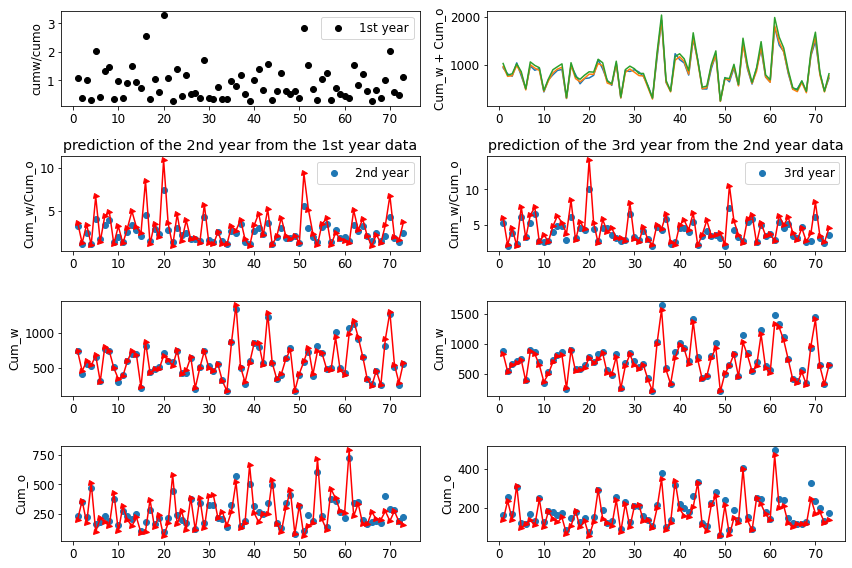

In [6]:

fig, ax = plt.subplots(4,2,figsize=[12,8])

wells = np.linspace(1,73,73)
# ratios
Awo =  df_hist['cumw1'].values/df_hist['cumo1'].values
Bwo = (df_hist['cumw2'].values - df_hist['cumw1'].values) / (df_hist['cumo2'].values - df_hist['cumo1'].values)
Cwo = (df_hist['cumw3'].values - df_hist['cumw2'].values) / (df_hist['cumo3'].values - df_hist['cumo2'].values)

# STB
Aw = df_hist['cumw1']
Bw = df_hist['cumw2'] - df_hist['cumw1']
Cw = df_hist['cumw3'] - df_hist['cumw2']

Ao = df_hist['cumo1']
Bo = df_hist['cumo2'] - df_hist['cumo1']
Co = df_hist['cumo3'] - df_hist['cumo2']

A, B, C = Aw+Ao, Bw+Bo, Cw+Co

print(np.mean(Awo),np.mean(Bwo), np.mean(Cwo))


ax[0,0].scatter(wells, Awo, color='k', label='1st year')
ax[0,0].set_ylabel('cumw/cumo')
ax[0,0].legend()

ax[0,1].plot(wells, A, label='1st year')
ax[0,1].plot(wells, B, label='2nd year')
ax[0,1].plot(wells, C, label='3rd year')
ax[0,1].set_ylabel('Cum_w + Cum_o')
# ax[0,1].legend(loc='best')

# 2nd year water to oil ratio
m = 3.3
ax[1,0].scatter(wells,Bwo, label='2nd year')
ax[1,0].plot(wells, Awo*m, marker='>', markersize=5, color='r')
ax[1,0].set_ylabel('Cum_w/Cum_o')
ax[1,0].set_title('prediction of the 2nd year from the 1st year data')
ax[1,0].legend()

# 2nd year cumulative oil and water 
Bw_forecast = m*Awo/(1+m*Awo)*A
Bo_forecast = 1/(1+m*Awo)*A
ax[2,0].scatter(wells, Bw)
ax[2,0].plot(wells, Bw_forecast, marker='>', markersize=5, color='r' )
ax[2,0].set_ylabel('Cum_w')

ax[3,0].scatter(wells, Bo)
ax[3,0].plot(wells, Bo_forecast, marker='>', markersize=5, color='r' )
ax[3,0].set_ylabel('Cum_o')

# 3rd year water to oil ratio
# Note: we can use Awo*m*n but Bwo*n gives more accuracy because 
# its directly from the 2nd year data.
n = 1.9
ax[1,1].scatter(wells,Cwo, label='3rd year')
ax[1,1].plot(wells, Bwo*n, marker='>', markersize=5, color='r' )
ax[1,1].set_ylabel('Cum_w/Cum_o')
ax[1,1].set_title('prediction of the 3rd year from the 2nd year data')
ax[1,1].legend()

# 3rd year cumulative oil and water 
Cw_forecast = n*Bwo/(1+n*Bwo)*B
Co_forecast = 1/(1+n*Bwo)*B
ax[2,1].scatter(wells, Cw)
ax[2,1].plot(wells, Cw_forecast, marker='>', markersize=5, color='r' )
ax[2,1].set_ylabel('Cum_w')

ax[3,1].scatter(wells, Co)
ax[3,1].plot(wells, Co_forecast, marker='>', markersize=5, color='r' )
ax[3,1].set_ylabel('Cum_o')

plt.tight_layout()

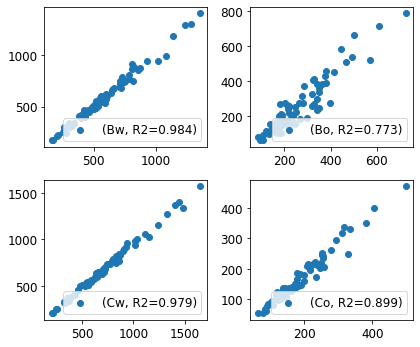

In [7]:

from sklearn.metrics import r2_score
R2_Bw = r2_score(Bw, Bw_forecast)
R2_Bo = r2_score(Bo, Bo_forecast)
R2_Cw = r2_score(Cw, Cw_forecast)
R2_Co = r2_score(Co, Co_forecast)

fig, ax = plt.subplots(2,2,figsize=[6,5])

ax[0,0].scatter(Bw, Bw_forecast, label='(Bw, R2=%2.3f)'%R2_Bw)
# ax[0,0].set_xlim([min(Bw),max(Bw)])
# ax[0,0].set_aspect(1)
ax[0,0].legend(loc=4)

ax[0,1].scatter(Bo, Bo_forecast, label='(Bo, R2=%2.3f)'%R2_Bo)
ax[0,1].legend(loc=4)

ax[1,0].scatter(Cw, Cw_forecast, label='(Cw, R2=%2.3f)'%R2_Cw)
ax[1,0].legend(loc=4)

ax[1,1].scatter(Co, Co_forecast, label='(Co, R2=%2.3f)'%R2_Co)
ax[1,1].legend(loc=4)

#ax[1,1].set_box_aspect(1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

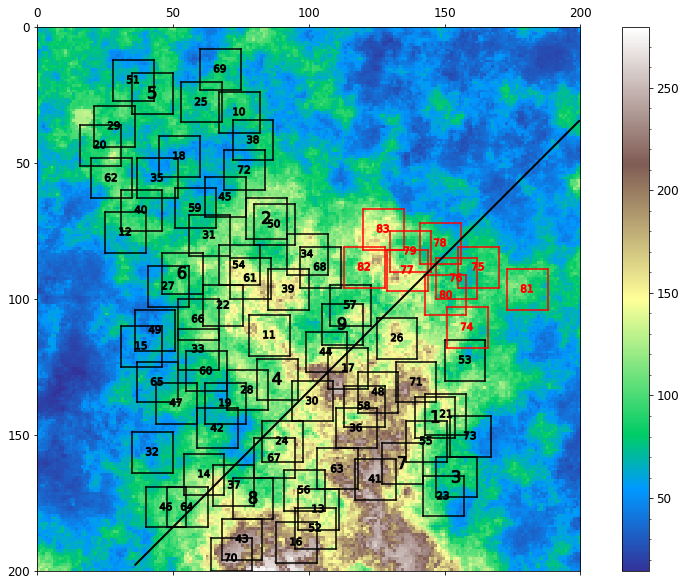

In [10]:
def get_well_loc(df_wells, well_id):
    well_id_exist = any(df_wells['id']==well_id)
    if ~well_id_exist:
        return None
    else:
        i, j = df_wells[df_wells['id']==well_id][['i','j']].iloc[0]
    
    return (i,j)

def get_property_at(i,j,geo_model):
    return geo_model[j,i]
    
def get_window_extent(i,j,h):
    # slice indexes of the geo_model map
    ii = (max(0,i-h), min(200,i+h+1))
    jj = (max(0,j-h), min(200,j+h+1))
    
    (left, right, bottom, top) = (ii[0], ii[1], jj[1], jj[0])
    extent = (left, right, bottom, top)
    
    return extent

def get_window_around_ij(i, j, h, geo_model):
    # slice indexes of the geo_model map
    ii = (max(0,i-h), min(200,i+h+1))
    jj = (max(0,j-h), min(200,j+h+1))
    
    (left, right, bottom, top) = (ii[0], ii[1], jj[1], jj[0])
    extent = (left, right, bottom, top)
    
    return geo_model[jj[0]:jj[1], ii[0]:ii[1]], extent

def plot_window(geo_model_window, extent, ax):
    img = ax.matshow(geo_model_window, extent=extent)
    cbar = fig.colorbar(img, ax=ax)
    cbar.minorticks_on()

def plot_marker(ivec,jvec,ax,**kwargs):
    ax.scatter([i+0.5 for i in ivec], [j+0.5 for j in jvec], **kwargs)

def plot_box(extent, ax, **kwargs):
    (left,right,bottom,top) = extent
    ax.plot([left,left], [top,bottom], **kwargs)
    ax.plot([right,right], [top,bottom], **kwargs)
    ax.plot([left,right], [top,top], **kwargs)
    ax.plot([left,right], [bottom,bottom], **kwargs)

def plot_all_wells(df_wells, ax, **kwargs):
    color = kwargs['color']
    ivec, jvec = df_wells[['i','j']].values.transpose()
#     print(ivec,jvec)
#     ax.scatter(ivec, jvec, **kwargs)
    
    for well_id in df_wells['id'].value_counts().index:
        ivec, jvec = df_wells[df_wells['id']==well_id].iloc[0][['i','j']].values.transpose()
        well_no = int(well_id.rsplit('_',maxsplit=1)[-1])
        ax.scatter(ivec, jvec, **{'marker':('$%d$' %well_no),'s':150, 'color':color})
        
def get_mean(geo_model_window):
    return np.mean(geo_model_window)

def get_mean_at_well(df_wells, well_id, geo_model, win_size):
    i,j = get_well_loc(df_wells, well_id)
    geo_model_window, extent = get_window_around_ij(i,j, win_size, permeability)
    return get_mean(geo_model_window)

def plot_fault(ax):
    x = np.linspace(0,10000, 50)
    y= np.linspace(0,10000, 50)
    fault = -x + 11750
    x = x[fault<=10000]
    fault = fault[fault<=10000]
    
    ax.plot((x-25)/50,(fault-25)/50, color='k',linewidth=2)
    
##############################################
# example sets on how to use handler functions
##############################################
plt.set_cmap('terrain')
fig, ax = plt.subplots(1,1,figsize=[15,10])
ax.xaxis.tick_top()  

def plot_all_boxes(df_wells, ax, **kwargs):
    for well_id in df_wells['id'].value_counts().index:
        i, j = df_wells[df_wells['id']==well_id].iloc[0][['i','j']].values.transpose()
        geo_model_window, extent = get_window_around_ij(i,j, 7, permeability)
        plot_box(extent, ax, **kwargs)
        
# i,j = df_producers[df_producers['id']=='Well_no_3'][['i','j']].iloc[0]
# print(('geo-model value at (%d,%d): ' %(i,j)), get_property_at(i,j,permeability))
# geo_model_window, extent = get_window_around_ij(i,j, 500, permeability)
# plot_window(geo_model_window, extent,ax)
# plot_marker([i],[j],ax, **{'color':'r', 'marker':('$%d$' %i),'s':300})
# plot_box(extent)

plot_window(permeability, (0,200,200,0),ax)

plot_all_wells(df_nonproducers, ax, **{'color':'r'})
plot_all_wells(df_producers, ax, **{'color':'k'})
plot_all_boxes(df_producers, ax, **{'color':'k'})
plot_all_boxes(df_nonproducers, ax, **{'color':'r'})
plot_fault(ax)

plt.show()

In [12]:
from sklearn import preprocessing

def set_avg_depth(df_wells):
    for well_id in df_wells['id'].value_counts().index:
        df_wells.loc[df_wells['id']==well_id, 'depth'] = np.mean(df_wells[df_wells['id']==well_id]['depth'].values)

def set_mean_geo_model(df_wells, geo_model, newcol):
    for well_id in df_wells['id']:
        i,j,h = df_wells.loc[df_wells['id']==well_id][['i','j','h1']].iloc[0]
        
        geo_model_window, extent = get_window_around_ij(i, j, h, geo_model)
        df_wells.loc[df_wells['id']==well_id, newcol] = np.mean(geo_model_window) 

def is_inside(extent, ii,jj):
    (left, right, bottom, top) = extent
    if (left<=ii and ii<=right and top<=jj and jj<=bottom):
        return True
    else:
        return False

def get_dist(i,j,ii,jj):
    return np.sqrt((i-ii)**2 + (j-jj)**2)

def get_neighbors(df_wells):
    final_book = {}
    for well_id in df_wells['id']:
        i,j,h = df_wells.loc[df_wells['id']==well_id][['i','j','h1']].iloc[0]
        extent = get_window_extent(i, j, h)
        neighbor_book = []
   
        for neighbor in df_wells['id']:
            ii,jj = df_wells.loc[df_wells['id']==neighbor][['i','j']].iloc[0]
            if is_inside(extent, ii, jj):
                por, perm, depth, win_size = df_wells.loc[df_wells['id']==neighbor][['por1','k1','depth','h1']].iloc[0]
                dist = get_dist(i,j,ii,jj)
                neighbor_book.append([dist, por, perm, depth, win_size, well_id]) 
        
        final_book[well_id] = neighbor_book
    
    return final_book

def get_avg_neighbors(neighbors_info):
    avg = {'dist_n':[], 'por_n':[], 'k_n':[], 'depth_n':[]}
    for vv in neighbors_info:
        dist_n, k_n, por_n, depth_n = 0,0,0,0
        ctr = 0
        for v in vv:
            # collect various neighbor information
            [dist,por,perm,depth,win_size] = v[:5]
            dist_n += dist
            por_n += por * dist
            k_n += perm * dist
            depth_n += depth * dist
            
            ctr += 1
            
        avg['dist_n'].append(dist_n/ctr)
        avg['por_n'].append(por_n/ctr)
        avg['k_n'].append(k_n/ctr)
        avg['depth_n'].append(depth_n/ctr)
        
    return avg


df_features = df_producers.append(df_nonproducers, ignore_index=True)
df_features = df_features.drop(['ai','facies','vel','sh_v','E','rho','G'], axis=1)

# instead of depth set each well to its avg depth
set_avg_depth(df_features)
# drop duplicate rows and reset index
df_features = df_features.drop_duplicates(subset='id').reset_index()

# use the vertically averaged values of poro and perm for each well
df_imputed = df_p_imputed.append(df_n_imputed, ignore_index=True)
df_features['poro'] = df_imputed['Porosity']
df_features['perm'] = df_imputed['Perm']


# drop the index col that automatically was added
df_features = df_features.drop(['index'], axis=1)
# set window size
df_features['h1'] = 7
# define new col for avg_perm
df_features['k1'] = np.nan
df_features['por1'] = np.nan
df_features['sand1'] = np.nan
df_features['sh_sand1'] = np.nan
df_features['sandy_sh1'] = np.nan

set_mean_geo_model(df_features, permeability, 'k1')
set_mean_geo_model(df_features, porosity, 'por1')
set_mean_geo_model(df_features, sand_proportion, 'sand1')
set_mean_geo_model(df_features, shaly_sand_proportion, 'sh_sand1')
set_mean_geo_model(df_features, sandy_shale_proportion, 'sandy_sh1')

# net-to-gross-ratio
df_features['NTGR'] = np.nan
df_features = df_features.assign(NTGR = df_features['sand1'].values + df_features['sh_sand1'].values )



# add neighboring wells info
print('collecting neighbors ...')
final_book = get_neighbors(df_features) # dictionary of wells with info about their neighbors
avg_props = get_avg_neighbors(final_book.values())
df_avg_props = pd.DataFrame(avg_props)
print(df_avg_props)

df_features = pd.concat([df_features, df_avg_props], axis=1)



df_features


collecting neighbors ...
      dist_n     por_n         k_n       depth_n
0   2.061553  0.265868  244.977457   6304.084193
1   1.802776  0.229205  188.835085   5502.539968
2   4.301163  0.531399  353.487704  13164.396426
3   0.000000  0.000000    0.000000      0.000000
4   4.301163  0.503623  311.980110  13168.224461
..       ...       ...         ...           ...
78  3.535534  0.461668  451.247457  10792.252603
79  3.605551  0.441642  302.753111  11011.389651
80  0.000000  0.000000    0.000000      0.000000
81  0.000000  0.000000    0.000000      0.000000
82  0.000000  0.000000    0.000000      0.000000

[83 rows x 4 columns]


,id,x,y,depth,poro,perm,i,j,h1,k1,por1,sand1,sh_sand1,sandy_sh1,NTGR,dist_n,por_n,k_n,depth_n
0,Well_no_1,7325,7175,3057.55,0.136063,163.838508,146,143,7,123.315047,0.133278,0.377611,0.454151,0.156832,0.831762,2.061553,0.265868,244.977457,6304.084193
1,Well_no_2,4225,3525,3052.54,0.129081,130.489441,84,70,7,110.224888,0.126293,0.260113,0.536685,0.056310,0.796797,1.802776,0.229205,188.835085,5502.539968
2,Well_no_3,7725,8275,3060.67,0.121242,72.512814,154,165,7,77.944892,0.118427,0.267825,0.524498,0.049893,0.792323,4.301163,0.531399,353.487704,13164.396426
3,Well_no_4,4425,6475,3051.61,0.141104,152.869748,88,129,7,121.677797,0.131715,0.399213,0.399094,0.201693,0.798307,0.000000,0.000000,0.000000,0.000000
4,Well_no_5,2125,1225,3060.45,0.129506,81.170991,42,24,7,82.892459,0.118159,0.125584,0.678815,0.000000,0.804399,4.301163,0.503623,311.980110,13168.224461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Well_no_79,6875,4125,3052.88,0.144792,100.258767,137,82,7,104.322493,0.125155,0.321955,0.481994,0.058777,0.803948,3.535534,0.461668,451.247457,10792.252603
79,Well_no_80,7525,4925,3053.74,0.125907,131.934410,150,98,7,95.943846,0.124643,0.336660,0.480447,0.091657,0.817106,3.605551,0.441642,302.753111,11011.389651
80,Well_no_81,9025,4825,3056.42,0.124459,153.705566,180,96,7,90.610830,0.121879,0.207120,0.611338,0.000089,0.818458,0.000000,0.000000,0.000000,0.000000
81,Well_no_82,6025,4425,3051.49,0.122797,156.369967,120,88,7,122.614410,0.130329,0.381912,0.420091,0.196431,0.802003,0.000000,0.000000,0.000000,0.000000


In [13]:
df_training = df_features.iloc[0:73,:]


df_training = df_training.assign(cumw1=df_hist['cumw1'].values)
df_training = df_training.assign(cumo1=df_hist['cumo1'].values)
df_training = df_training.assign(cumt1=df_hist['cumw1'].values+df_hist['cumo1'].values)

df_training = df_training.assign(qo1 = df_hist['cumo1'].values*1000/365)
df_training = df_training.assign(qo2 = (df_hist['cumo2'].values - df_hist['cumo1'].values) *1000/365)
df_training = df_training.assign(qo3 = (df_hist['cumo3'].values - df_hist['cumo2'].values) *1000/365)


df_training = df_training.assign(qw1 = df_hist['cumw1'].values*1000/365)
df_training = df_training.assign(qw2 = (df_hist['cumw2'].values - df_hist['cumw1'].values) *1000/365)
df_training = df_training.assign(qw3 = (df_hist['cumw3'].values - df_hist['cumw2'].values) *1000/365)

df_training = df_training.assign(Awo = df_training['qw1'].values/df_training['qo1'].values)
df_training = df_training.assign(Bwo = df_training['qw2'].values/df_training['qo2'].values)
df_training = df_training.assign(Cwo = df_training['qw3'].values/df_training['qo3'].values)

# avg reservoir pressure around each well (psi)
df_training = df_training.assign(Avg_P=df_training['depth'].values * 3.2808 * 0.7)


df_training


,id,x,y,depth,poro,perm,i,j,h1,k1,...,qo1,qo2,qo3,qw1,qw2,qw3,Awo,Bwo,Cwo,Avg_P
0,Well_no_1,7325,7175,3057.55,0.136063,163.838508,146,143,7,123.315047,...,1235.561644,638.958904,446.931507,1355.863014,2031.534247,2389.863014,1.097366,3.179444,5.347269,7021.847028
1,Well_no_2,4225,3525,3052.54,0.129081,130.489441,84,70,7,110.224888,...,1628.575342,964.876712,697.506849,621.835616,1149.397260,1482.739726,0.381828,1.191237,2.125771,7010.341262
2,Well_no_3,7725,8275,3060.67,0.121242,72.512814,154,165,7,77.944892,...,1045.890411,629.123288,465.808219,1077.178082,1520.575342,1794.301370,1.029915,2.416975,3.852017,7029.012295
3,Well_no_4,4425,6475,3051.61,0.141104,152.869748,88,129,7,121.677797,...,2180.328767,1279.397260,850.410959,693.835616,1449.671233,1974.027397,0.318225,1.133089,2.321263,7008.205462
4,Well_no_5,2125,1225,3060.45,0.129506,81.170991,42,24,7,82.892459,...,712.054795,456.219178,334.958904,1434.684932,1817.369863,2042.465753,2.014852,3.983546,6.097661,7028.507052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Well_no_69,3375,775,3059.64,0.123919,86.086008,67,15,7,74.619315,...,1623.561644,1093.205479,899.945205,1635.671233,2220.493151,2562.191781,1.007459,2.031176,2.847053,7026.646838
69,Well_no_70,3575,9775,3060.30,0.132842,123.298784,71,195,7,208.908308,...,1344.958904,812.657534,642.657534,2743.287671,3509.863014,3953.972603,2.039681,4.318994,6.152534,7028.162568
70,Well_no_71,6975,6525,3055.04,0.141619,165.335846,139,130,7,169.605685,...,1410.356164,775.671233,549.835616,854.904110,1416.000000,1777.589041,0.606162,1.825516,3.232946,7016.082662
71,Well_no_72,3825,2625,3055.11,0.112624,58.172831,76,52,7,79.204150,...,886.876712,520.767123,366.438356,418.876712,717.315068,905.506849,0.472305,1.377420,2.471103,7016.243422


In [14]:
kro, muo, Bo = 0.7, 2, 1.2
k = df_training['k1'].values
PR = df_training['Avg_P'].values

h = 9.5*3.2808 #ft
rw=0.3 #ft
re=df_training['h1'].values*50*3.2808 #ft
factor1 = k*h / (141.2*muo*Bo*(np.log(re/rw)-0.75))  

qo = df_training['qo1'].values #+ df_training['qw1']
qw = df_training['qw1'].values

pwf1 = PR - qo/factor1
print('any negative pressure: %r'%any(pwf1<0))

pwf1

df_training = df_training.assign(pwf1 = pwf1)
df_training = df_training.assign(p2p2 = df_training['cumw1'].values * df_training['cumo1'].values)



# normalize data
cols = df_training.columns
normalize_list= [3,4,5]+[i for i in range(8,df_training.shape[1])] #['depth','h1','k1','por1','sand1','sh_sand1','sandy_sh1','NTGR']
print(cols)
print(cols[normalize_list])

x = df_training.iloc[:, normalize_list].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns = cols[normalize_list]

df_training = df_training.drop(cols[normalize_list], axis=1)
df_training = pd.concat([df_training, df_scaled], axis=1)


df_training

any negative pressure: False
Index(['id', 'x', 'y', 'depth', 'poro', 'perm', 'i', 'j', 'h1', 'k1', 'por1',
       'sand1', 'sh_sand1', 'sandy_sh1', 'NTGR', 'dist_n', 'por_n', 'k_n',
       'depth_n', 'cumw1', 'cumo1', 'cumt1', 'qo1', 'qo2', 'qo3', 'qw1', 'qw2',
       'qw3', 'Awo', 'Bwo', 'Cwo', 'Avg_P', 'pwf1', 'p2p2'],
      dtype='object')
Index(['depth', 'poro', 'perm', 'h1', 'k1', 'por1', 'sand1', 'sh_sand1',
       'sandy_sh1', 'NTGR', 'dist_n', 'por_n', 'k_n', 'depth_n', 'cumw1',
       'cumo1', 'cumt1', 'qo1', 'qo2', 'qo3', 'qw1', 'qw2', 'qw3', 'Awo',
       'Bwo', 'Cwo', 'Avg_P', 'pwf1', 'p2p2'],
      dtype='object')


,id,x,y,i,j,depth,poro,perm,h1,k1,...,qo3,qw1,qw2,qw3,Awo,Bwo,Cwo,Avg_P,pwf1,p2p2
0,Well_no_1,7325,7175,146,143,0.642218,0.584679,0.666101,0.0,0.437694,...,0.229656,0.449001,0.486196,0.461933,0.275988,0.325665,0.409985,0.642218,0.705433,0.230203
1,Well_no_2,4225,3525,84,70,0.194097,0.455952,0.481183,0.0,0.351698,...,0.439427,0.157491,0.214644,0.231998,0.039945,0.009254,0.010063,0.194097,0.479347,0.131994
2,Well_no_3,7725,8275,154,165,0.921288,0.311424,0.159707,0.0,0.139634,...,0.245459,0.338325,0.328905,0.310972,0.253737,0.204323,0.224362,0.921288,0.552561,0.148878
3,Well_no_4,4425,6475,88,129,0.110912,0.677612,0.605280,0.0,0.426938,...,0.567431,0.186085,0.307078,0.356528,0.018964,0.000000,0.034331,0.110912,0.332979,0.206121
4,Well_no_5,2125,1225,42,24,0.901610,0.463796,0.207716,0.0,0.172137,...,0.135917,0.480304,0.420268,0.373876,0.578650,0.453633,0.503140,0.901610,0.775206,0.133309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Well_no_69,3375,775,67,15,0.829159,0.360788,0.234969,0.0,0.117786,...,0.608899,0.560123,0.544364,0.505615,0.246329,0.142925,0.099604,0.829159,0.166162,0.375521
69,Well_no_70,3575,9775,71,195,0.888193,0.525290,0.441311,0.0,1.000000,...,0.393509,1.000000,0.941275,0.858400,0.586841,0.507018,0.509952,0.888193,0.874377,0.528790
70,Well_no_71,6975,6525,139,130,0.417710,0.687122,0.674403,0.0,0.741801,...,0.315803,0.250051,0.296713,0.306736,0.113949,0.110196,0.147509,0.417710,0.780850,0.160604
71,Well_no_72,3825,2625,76,52,0.423971,0.152547,0.080193,0.0,0.147907,...,0.162271,0.076888,0.081634,0.085682,0.069792,0.038884,0.052933,0.423971,0.647879,0.036947


In [17]:
below_fault = np.array([37,8,43,70,16,52,13,56,67,24,30,36,63,41,7,55,23,3,73,1,21,48,17,58,26,71,53])-1
df_training_below = df_training.iloc[below_fault,:]
df_training_below.head(10)

,id,x,y,i,j,depth,poro,perm,h1,k1,...,qo3,qw1,qw2,qw3,Awo,Bwo,Cwo,Avg_P,pwf1,p2p2
36,Well_no_37,3625,8425,72,168,0.647585,0.518159,0.146617,0.0,0.385250,...,0.083624,0.294139,0.286955,0.266561,0.310358,0.366316,0.483789,0.647585,0.846307,0.096980
7,Well_no_8,3975,8675,79,173,0.689624,0.441104,0.334509,0.0,0.447481,...,0.159404,0.492991,0.493592,0.455753,0.402756,0.447714,0.555101,0.689624,0.802543,0.197075
42,Well_no_43,3775,9425,75,188,0.837209,0.696586,0.581791,0.0,0.975235,...,0.450642,0.927873,0.895303,0.832844,0.430919,0.380383,0.419023,0.837209,0.802950,0.602616
69,Well_no_70,3575,9775,71,195,0.888193,0.525290,0.441311,0.0,1.000000,...,0.393509,1.000000,0.941275,0.858400,0.586841,0.507018,0.509952,0.888193,0.874377,0.528790
15,Well_no_16,4775,9475,95,189,0.838104,0.363156,0.261207,0.0,0.968314,...,0.194472,0.680962,0.555277,0.483948,0.761130,0.529663,0.505514,0.838104,1.000000,0.199109
51,Well_no_52,5125,9225,102,184,0.813059,0.654323,0.372977,0.0,0.726419,...,0.290849,0.533891,0.473022,0.431794,0.426301,0.287789,0.288292,0.813059,0.891550,0.217031
12,Well_no_13,5175,8875,103,177,0.753131,0.491413,0.295744,0.0,0.547376,...,0.228394,0.493774,0.457141,0.416446,0.409226,0.348829,0.362216,0.753131,0.847069,0.194836
55,Well_no_56,4925,8525,98,170,0.675313,0.199640,0.296665,0.0,0.481264,...,0.070344,0.280332,0.269733,0.240318,0.324311,0.362032,0.479300,0.675313,0.902550,0.085206
66,Well_no_67,4375,7925,87,158,0.492844,0.301515,0.248800,0.0,0.392988,...,0.124151,0.204897,0.246507,0.247102,0.137488,0.206013,0.342815,0.492844,0.732341,0.102077
23,Well_no_24,4525,7625,90,152,0.405188,0.414427,0.282128,0.0,0.470758,...,0.132271,0.143901,0.225734,0.245151,0.063242,0.161473,0.322421,0.405188,0.697401,0.095004


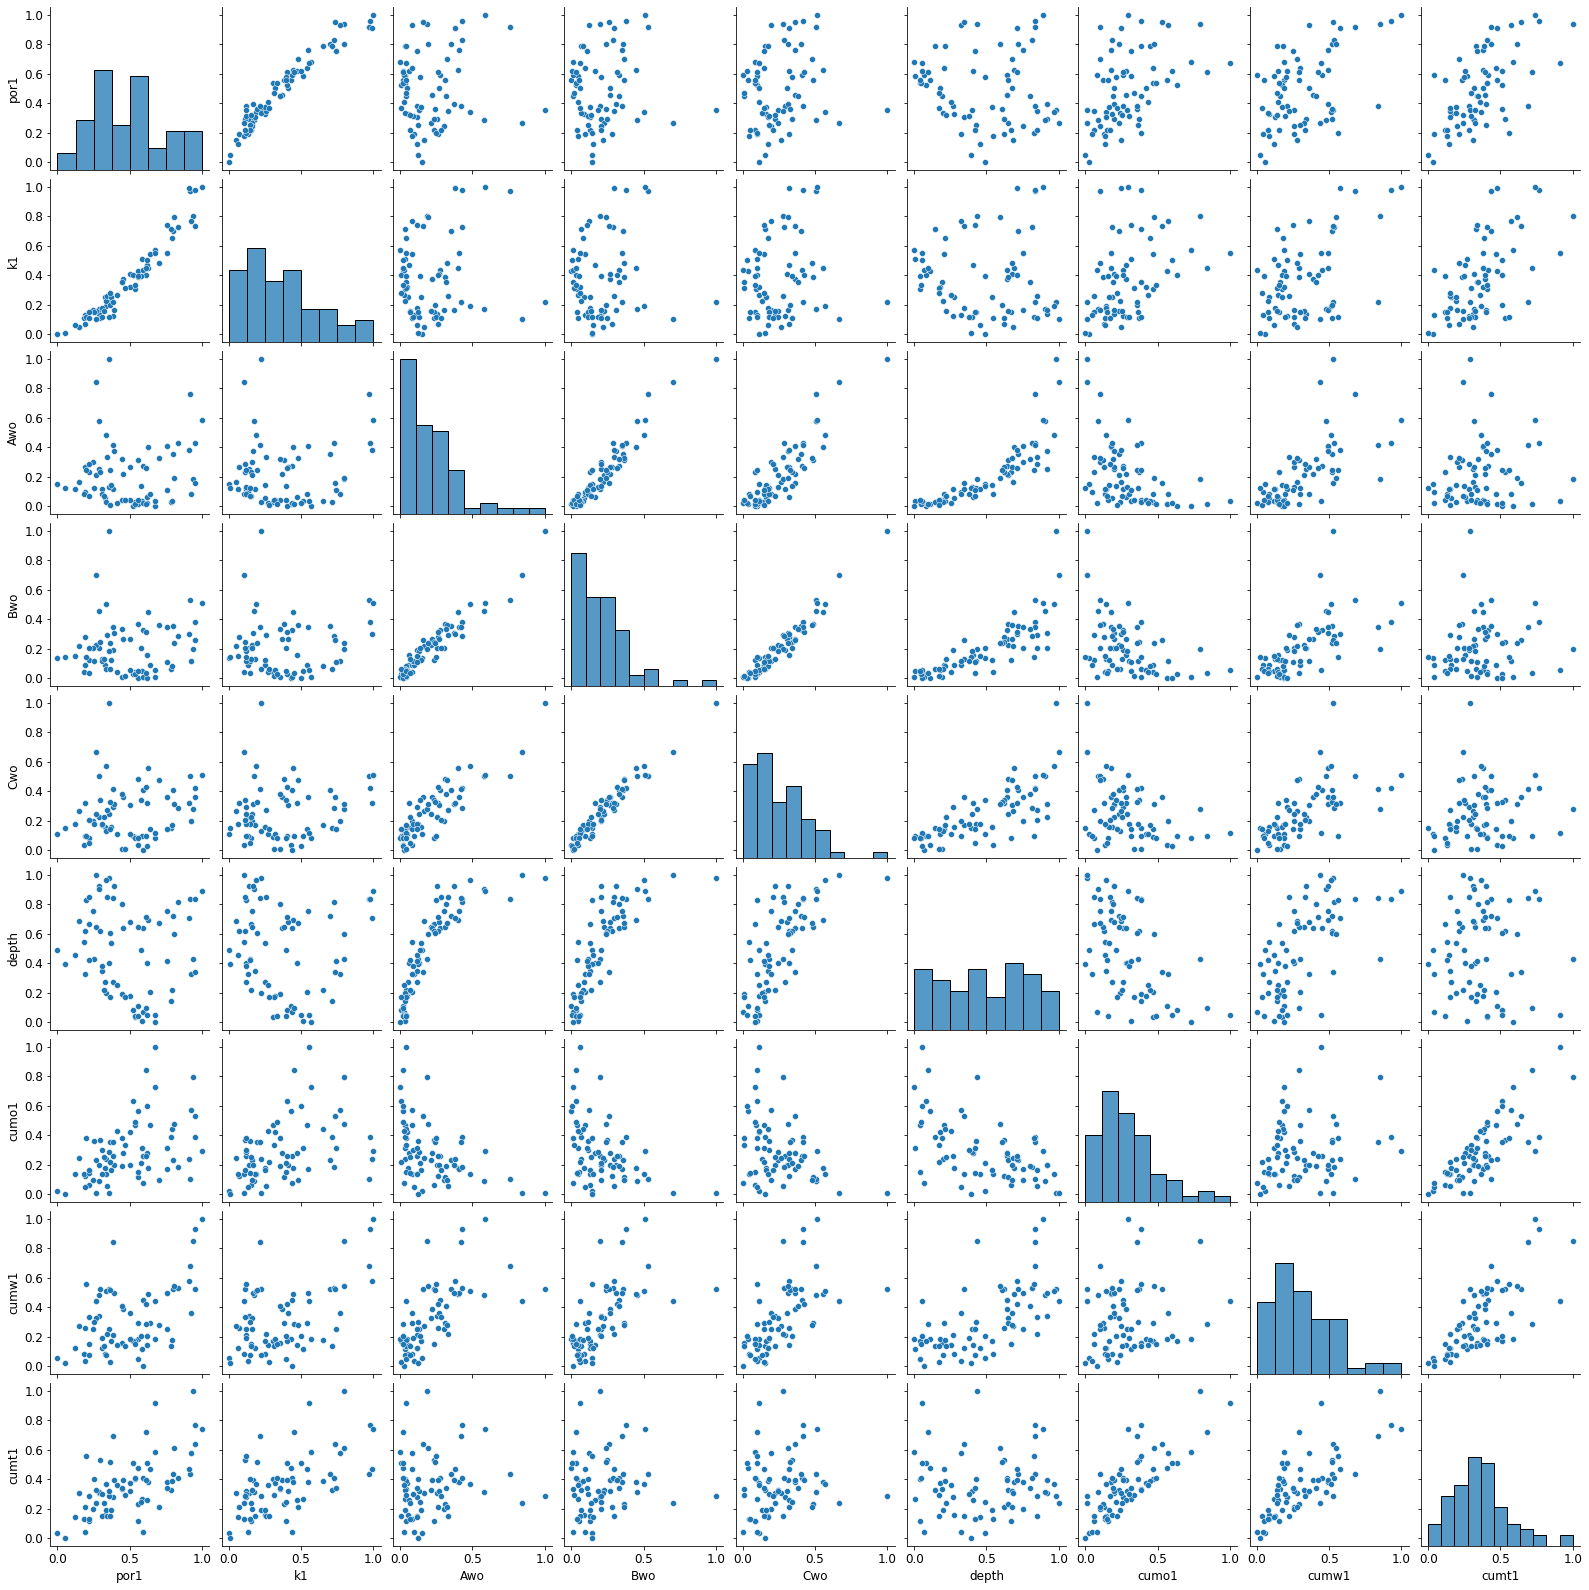

In [27]:
sns.pairplot(df_training, vars=['por1','k1','Awo','Bwo','Cwo','depth','cumo1','cumw1','cumt1'])
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, ExtraTreesRegressor
from sklearn import metrics

def regress_rf(X_variables, y_variable, label, shap=False):
    print("Features size: ", X_variables.shape)
    y_trains = []
    y_pred_trains = []
    y_tests = []
    y_pred_tests = []
    np.random.seed(1)
    NN =10
    for i in range(NN):
        X_train, X_test, y_train, y_test = train_test_split(X_variables, y_variable, test_size = 0.3)
        
        regressor = RandomForestRegressor(n_estimators=800, max_depth=50, min_samples_leaf=2,\
                                   min_samples_split= 2, max_features= 'sqrt', bootstrap =False )

        regressor.fit(X_train, y_train)
        y_pred_test = regressor.predict(X_test)

        y_pred_train = regressor.predict(X_train)
        if i < NN-1:
            del regressor
        y_trains.append(y_train)
        y_pred_trains.append(y_pred_train)
        y_tests.append(y_test)
        y_pred_tests.append(y_pred_test)
    
    # 
    y_trains = np.array(y_trains).flatten()
    y_pred_trains = np.array(y_pred_trains).flatten()
    y_tests = np.array(y_tests).flatten()
    y_pred_tests = np.array(y_pred_tests).flatten()

    print("\nMETRICS FOR TESTING DATA:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_tests, y_pred_tests))
    print('Mean Squared Error:', metrics.mean_squared_error(y_tests, y_pred_tests))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_tests, y_pred_tests)))
    print('R-Squared:', metrics.r2_score(y_tests, y_pred_tests))
    print('Explained variance:', metrics.explained_variance_score(y_tests, y_pred_tests))
    print("\nMETRICS FOR TRAINING DATA:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_trains, y_pred_trains))
    print('Mean Squared Error:', metrics.mean_squared_error(y_trains, y_pred_trains))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_trains, y_pred_trains)))
    print('R-Squared:', metrics.r2_score(y_trains, y_pred_trains))
    print('Explained variance:', metrics.explained_variance_score(y_trains, y_pred_trains))

    
    # Training data plot
    with sns.axes_style('white'):
        g = (sns.jointplot(x=y_trains, y=y_pred_trains, kind='scatter', height=11).set_axis_labels
             ("Observed {}".format(label), "Modeled {}".format(label)))  

    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')
    plt.savefig(
        "Regression_rf_training.png",
        bbox_inches='tight', dpi=200)
    plt.show()

    plt.close()

    # Testing data plot
    with sns.axes_style('white'):
        g = (sns.jointplot(x=y_tests, y=y_pred_tests, kind='scatter', height=11).set_axis_labels
             ("Observed {}".format(label), "Modeled {}".format(label)))

    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')
    plt.savefig(
        "Regression_rf_testing.png",
        bbox_inches='tight', dpi=200)
    plt.show()
    plt.close()
    

    #SHAP ###
#     if shap:
#         import shap
#         samples = shap.sample(X_train, 10)
#         explainer = shap.KernelExplainer(regressor.predict, samples)

#         shap_values = explainer.shap_values(X_train)
#         v = plt.figure("shap")
#         shap.summary_plot(shap_values, X_train)
#         v.savefig("shap_plot1_rf.png", bbox_inches='tight', dpi=200)
#         plt.close()
#         b = plt.figure("shap_bar")
#         shap.summary_plot(shap_values, X_train, plot_type="bar")
#         b.savefig("shap_plot_bar_rf.png", bbox_inches='tight', dpi=200)
#         plt.close()

    return regressor

In [ ]:
['id', 'x', 'y', 'depth', 'i', 'j', 'h1', 'k1', 'por1', 'sand1',
       'sh_sand1', 'sandy_sh1', 'NTGR', 'dist_n', 'por_n', 'k_n', 'depth_n',
       'cumw1', 'cumo1', 'cumt1', 'qo1', 'qo2', 'qo3', 'qw1', 'qw2', 'qw3',
       'Awo', 'Bwo', 'Cwo', 'Avg_P', 'pwf1', 'p2p2']

Features size:  (73, 6)

METRICS FOR TESTING DATA:

Mean Absolute Error: 0.09225100777269461
Mean Squared Error: 0.016172894423532144
Root Mean Squared Error: 0.1271726952750949
R-Squared: 0.7059997183377272
Explained variance: 0.7060486713618699

METRICS FOR TRAINING DATA:

Mean Absolute Error: 0.026302910100573562
Mean Squared Error: 0.001658274895247814
Root Mean Squared Error: 0.040721921556427246
R-Squared: 0.9626985755459097
Explained variance: 0.9626985755459097


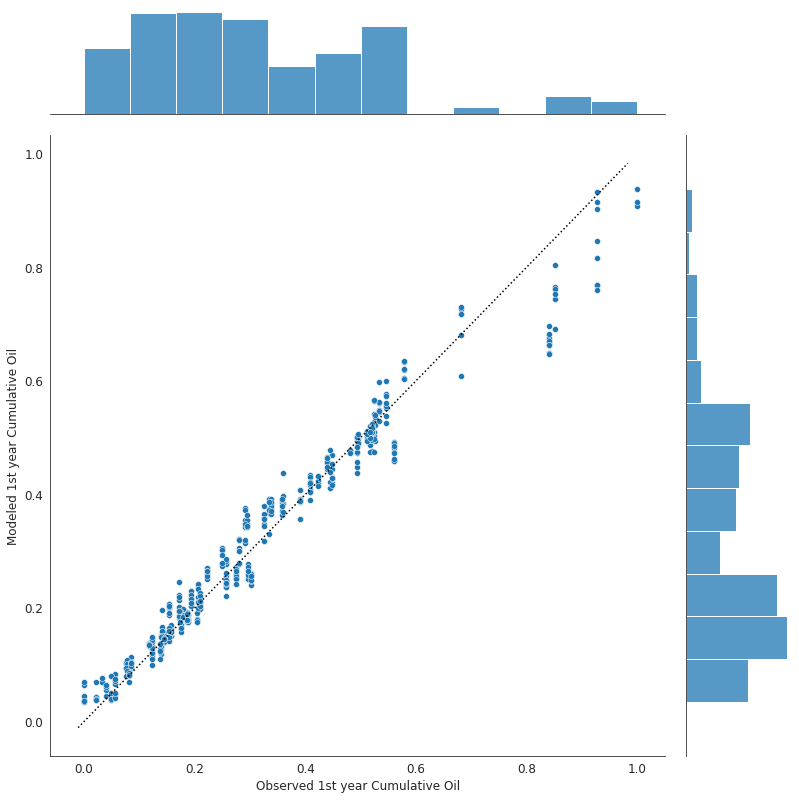

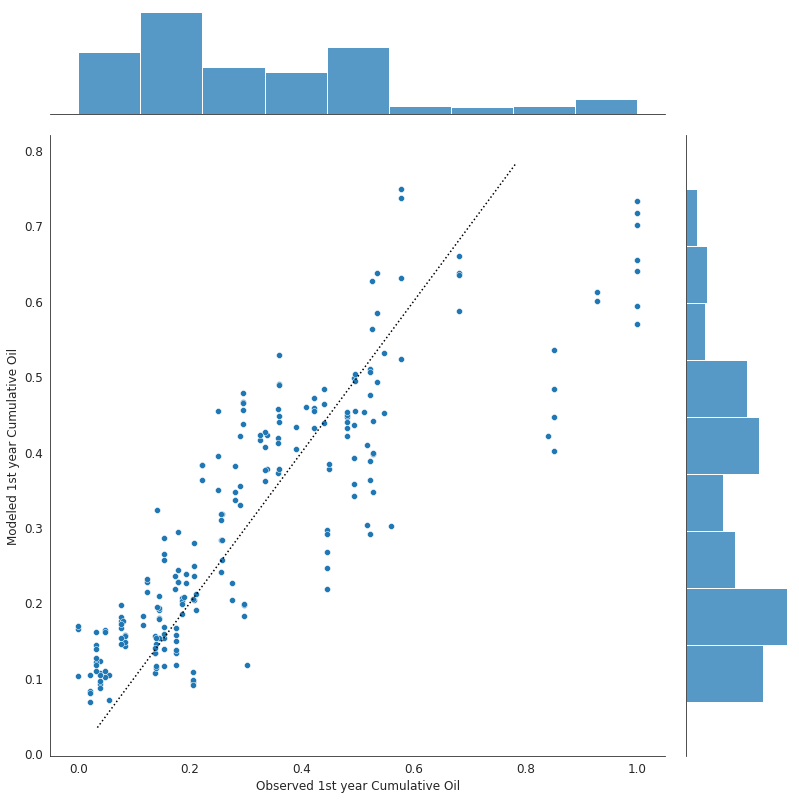

In [25]:
X_total = df_training[['depth','poro','k1','por1','dist_n','NTGR']]
y_total = df_training['cumw1']
label = '1st year Cumulative Oil'

regressor_total1 = regress_rf(X_total, y_total, label)

<Figure size 432x288 with 0 Axes>

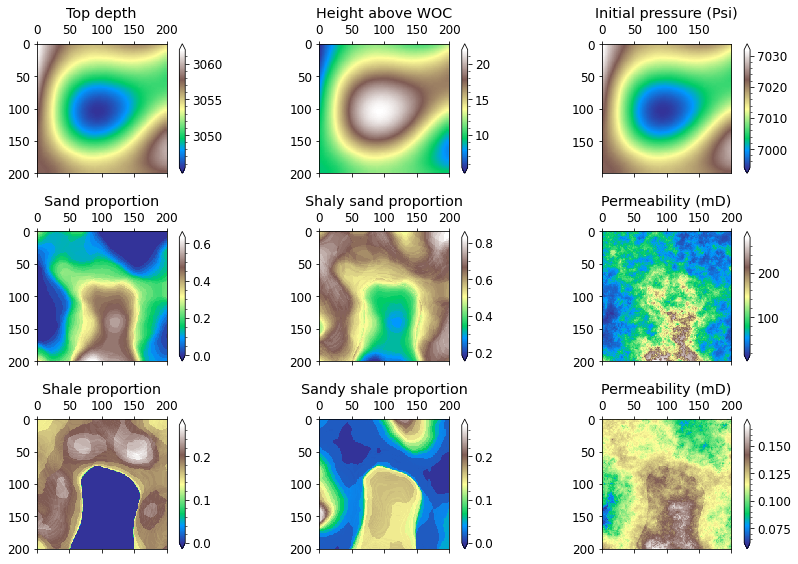

In [24]:
%matplotlib inline
mpl.rcParams.update({'font.size': 12})
plt.set_cmap('terrain')

fig, ax = plt.subplots(3,3,figsize=[12,8])
reservoir_extent = (0,200,200,0)
producer_marker_style = {'marker': 'o', 'edgecolor':'w', 'color':'k'}
nonproducer_marker_style = {'marker': 'o', 'edgecolor':'k', 'color': 'w'}

# depth map
min_td = np.min(top_depth)
max_td = np.max(top_depth)

im1 = ax[0,0].matshow(top_depth, vmin=min_td, vmax=max_td, extent=reservoir_extent)
cbar1 = fig.colorbar(im1, ax=ax[0,0], extend='both')
cbar1.minorticks_on()
ax[0,0].set_title('Top depth')

# height w.r.t WOC
min_ht = np.min(dis_woc)
max_ht = np.max(dis_woc)
im2 = ax[0,1].matshow(dis_woc,  extent=reservoir_extent) 
cbar2=fig.colorbar(im2, ax=ax[0,1], extend='both')
cbar2.minorticks_on()
ax[0,1].set_title('Height above WOC')

# sandy proportion
im3 = ax[1,0].matshow(sand_proportion, extent=reservoir_extent)
cbar3 = fig.colorbar(im3, ax=ax[1,0], extend='both')
cbar3.minorticks_on()
ax[1,0].set_title('Sand proportion')

# shaly sand proportion
im4 = ax[1,1].matshow(shaly_sand_proportion, extent=reservoir_extent)
cbar4 = fig.colorbar(im4, ax=ax[1,1], extend='both')
cbar4.minorticks_on()
ax[1,1].set_title('Shaly sand proportion')

# shaly sand proportion
im5 = ax[2,0].matshow(shale_proportion, extent=reservoir_extent)
cbar4 = fig.colorbar(im5, ax=ax[2,0], extend='both')
cbar4.minorticks_on()
ax[2,0].set_title('Shale proportion')

# shaly sand proportion
im6 = ax[2,1].matshow(sandy_shale_proportion, extent=reservoir_extent)
cbar6 = fig.colorbar(im5, ax=ax[2,1], extend='both')
cbar6.minorticks_on()
ax[2,1].set_title('Sandy shale proportion')

# initial pressure
im7 = ax[0,2].matshow(top_depth*3.2808*0.7)
cbar7 = fig.colorbar(im7, ax=ax[0,2], extend='both')
cbar7.minorticks_on()
ax[0,2].set_title('Initial pressure (Psi)')

# permeability map
im8 = ax[1,2].matshow(permeability, extent=reservoir_extent)
cbar8 = fig.colorbar(im8, ax=ax[1,2], extend='both')
cbar8.minorticks_on()
ax[1,2].set_title('Permeability (mD)')

# permeability map
im9 = ax[2,2].matshow(porosity, extent=reservoir_extent)
cbar9 = fig.colorbar(im9, ax=ax[2,2], extend='both')
cbar9.minorticks_on()
ax[2,2].set_title('Porosity')

# def add_map(ax, data, extent):
#     im = ax.matshow(data, extent=extent)
#     cbar = fig.colorbar(im, ax, extend='both')
#     cbar.minorticks_on()
#     ax.set_title('Shaly sand proportion')
#     return 0

# add_map(ax[2,0],sandy_shale_proportion,reservoir_extent)
# add_map(ax[2,1],shale_proportion,reservoir_extent)

plt.tight_layout()

# plot_all_wells(df_nonproducers, ax[1,2], **{'color':'r'})
# plot_all_wells(df_producers, ax[1,2], **{'color':'k'})

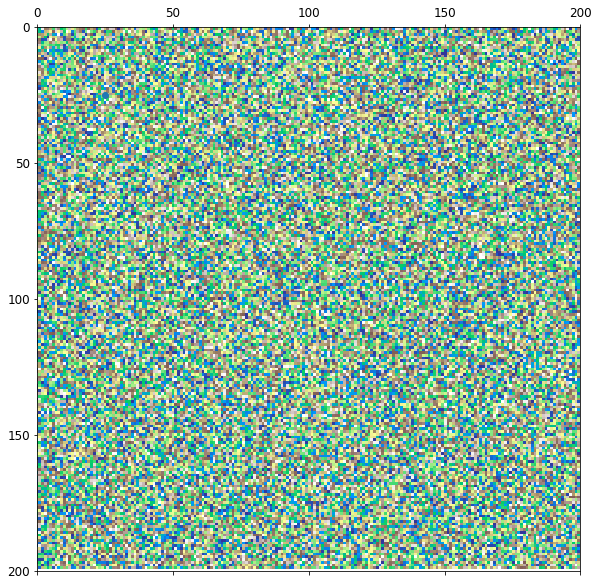

In [72]:
fig, ax = plt.subplots(1,1,figsize=[10,10])
ax.set_xlim([0,200])
ax.set_ylim([200,0])
ax.xaxis.tick_top()
ax.scatter(25, 25)

data = np.random.rand(200,200)
heatmap = ax.matshow(data)


In [20]:
df_producers.describe()

,"X, m","Y, m","Depth, m","Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2","Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear velocity, m/s","Shear modulus, GPa"
count,1460.000000,1460.000000,1460.000000,1268.000000,284.000000,1.357000e+03,1248.000000,1276.000000,1261.000000,1270.000000,1285.000000
mean,4188.698630,5770.890411,3055.810959,0.127746,112.182739,7.325786e+06,2.052521,3688.657853,27.288877,1676.158075,5.752640
std,1771.495039,2389.773641,4.353335,0.036020,80.894436,3.101125e+05,0.417622,727.216238,5.424608,100.630094,1.518699
min,1175.000000,775.000000,3045.620000,0.040270,2.214604,6.559277e+06,1.421943,1661.828496,13.205134,1307.887097,1.650985
25%,2925.000000,3825.000000,3052.720000,0.113953,51.540980,7.111056e+06,1.734052,3178.389486,23.466538,1608.928309,4.757475
50%,3875.000000,6125.000000,3055.790000,0.137495,93.980722,7.274333e+06,1.988542,3664.196826,26.647466,1674.836574,5.610267
75%,5325.000000,7625.000000,3058.982500,0.152325,154.584890,7.503378e+06,2.229507,4214.924966,30.874629,1746.081251,6.600503
max,7975.000000,9775.000000,3066.300000,0.188910,489.219402,8.249272e+06,3.530373,6179.653016,48.123292,1989.829247,11.820038


In [34]:
df_nonproducers.describe()

,"X, m","Y, m","Depth, m","Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2","Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear velocity, m/s","Shear modulus, GPa"
count,200.00000,200.000000,200.000000,176.000000,48.000000,1.870000e+02,163.000000,168.000000,167.000000,174.000000,176.000000
mean,7385.00000,4505.000000,3053.751000,0.128725,125.222460,7.310066e+06,2.033922,3687.544636,27.473558,1668.404041,5.809301
std,845.26467,489.179397,3.194208,0.038333,83.653397,3.268901e+05,0.386902,701.744626,5.690831,90.723222,1.373386
min,6025.00000,3725.000000,3046.740000,0.048450,12.856300,6.617929e+06,1.482503,2227.976873,16.535378,1425.170622,2.463956
25%,6825.00000,4125.000000,3051.255000,0.112465,59.368014,7.077094e+06,1.743189,3147.725651,23.215547,1602.559296,4.908638
50%,7475.00000,4450.000000,3053.750000,0.139425,109.536687,7.234540e+06,2.000809,3596.591856,26.610583,1666.323874,5.722072
75%,7925.00000,4825.000000,3056.245000,0.156935,168.879200,7.498666e+06,2.243124,4220.013876,31.188682,1731.496253,6.674499
max,9025.00000,5525.000000,3061.170000,0.183970,322.668020,8.108090e+06,3.508268,5320.215562,43.904056,1909.246524,10.338148


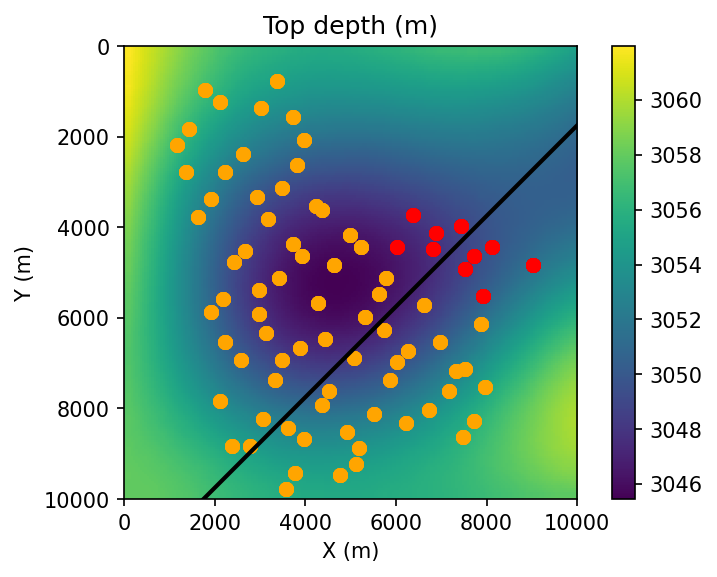

In [41]:
x = np.linspace(0,10000, 50)
y= np.linspace(0,10000, 50)
fault = -x + 11750
plt.figure(dpi=150)
plt.scatter(df_nonproducers["X, m"], df_nonproducers["Y, m"], color='r')
plt.scatter(df_producers["X, m"], df_producers["Y, m"], color = 'orange')
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Top depth (m)")
plt.imshow(top_depth, extent=(x.min(), x.max(), y.max(), y.min()),
           interpolation='nearest')
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()